## Importing libraries

In [1]:
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

## Importing training dataset

In [2]:
#creating dataframe object
df = pd.read_csv(R'winequalityN.csv')
print("Size :",df.shape)
columns = df.columns
columns

Size : (6497, 13)


Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [3]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
# statistical info
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [5]:
# dataset
df.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


# Exploratory data analysis

## Removing duplicate values 

In [6]:
data_unique = df.copy()
print("Size of dataset Before & After -->")
print("Before : "+str(data_unique.shape))
data_unique.drop_duplicates(keep = 'first', inplace = True)
print("After : "+str(data_unique.shape))
data_unique.head()
# df = data_unique

Size of dataset Before & After -->
Before : (6497, 13)
After : (5329, 13)


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


## Finding Null values

In [7]:
percent = df.isnull().sum()/df.isnull().count()*100
total = df.isnull().sum().sort_values(ascending=False)
percent_sorted = (round(percent, 2)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_sorted], axis=1, keys=['Total', '%'])
missing_data.head(7)

,Total,%
fixed acidity,10,0.15
pH,9,0.14
volatile acidity,8,0.12
sulphates,4,0.06
citric acid,3,0.05
chlorides,2,0.03
residual sugar,2,0.03


In [8]:
# check for null values
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [9]:
# fill the missing values
for col, value in df.items():
    if col != 'type':
        df[col] = df[col].fillna(df[col].mean())

In [10]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Finding extreme values 

In [11]:
df_copy = df.copy()
df_copy
min_col = {}
max_col = {}
for col in columns:
    max_col[col]= df_copy[col].max()
    min_col[col]= df_copy[col].min()
result = pd.DataFrame([min_col, max_col], index = ['Minimum', 'Maximum']).transpose()
result

,Minimum,Maximum
type,red,white
fixed acidity,3.8,15.9
volatile acidity,0.08,1.58
citric acid,0,1.66
residual sugar,0.6,65.8
chlorides,0.009,0.611
free sulfur dioxide,1,289
total sulfur dioxide,6,440
density,0.98711,1.03898
pH,2.72,4.01


## Finding uniques values 

In [12]:
df_copy = df.copy()
df_copy
values = {}
max_col = {}
for col in columns:
    unique_values = df_copy[col].unique()
    values[col] = unique_values if unique_values.size < 10 else unique_values.size
result = pd.DataFrame([values], index = ['Unique Values']).transpose()
result

,Unique Values
type,"[white, red]"
fixed acidity,107
volatile acidity,188
citric acid,90
residual sugar,317
chlorides,215
free sulfur dioxide,135
total sulfur dioxide,276
density,998
pH,109


# Exploratory Data Visualiztion

## Finding Outliers

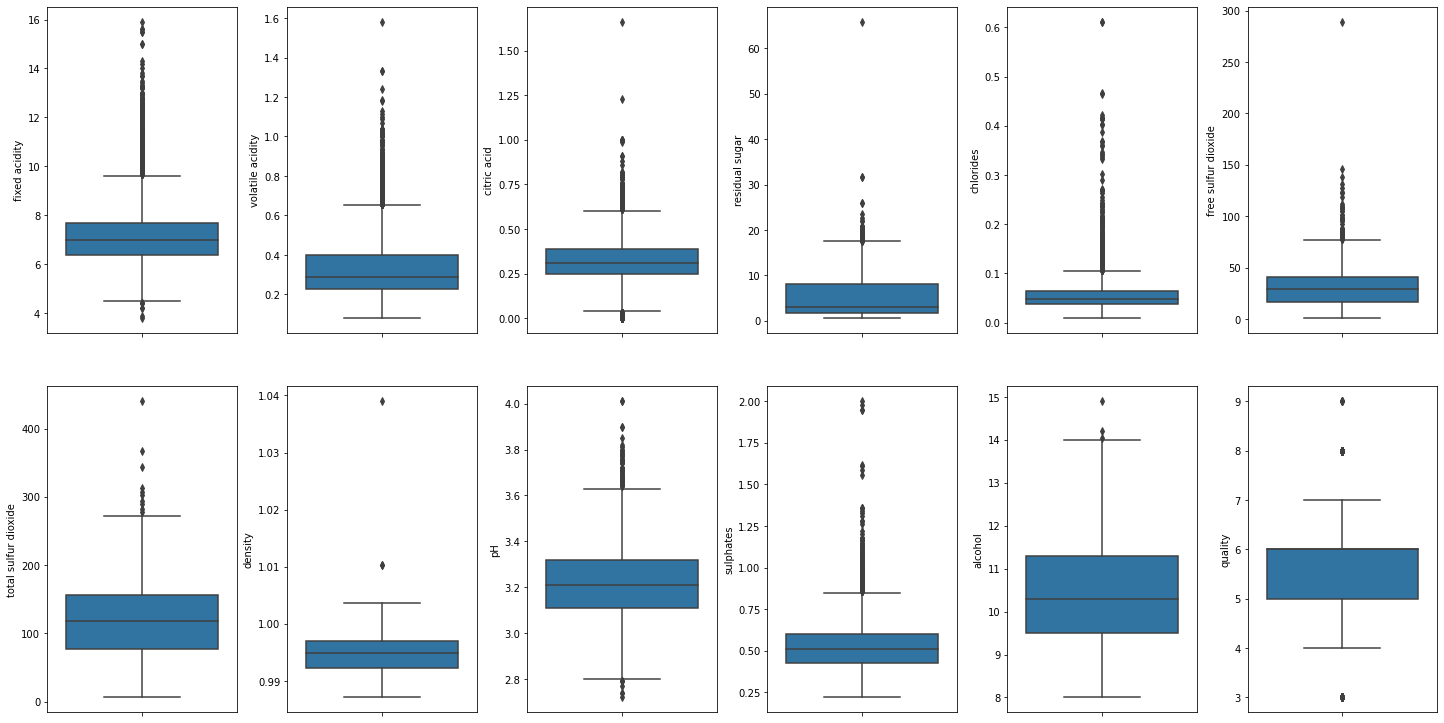

In [13]:
# create box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

## Distribution of values 

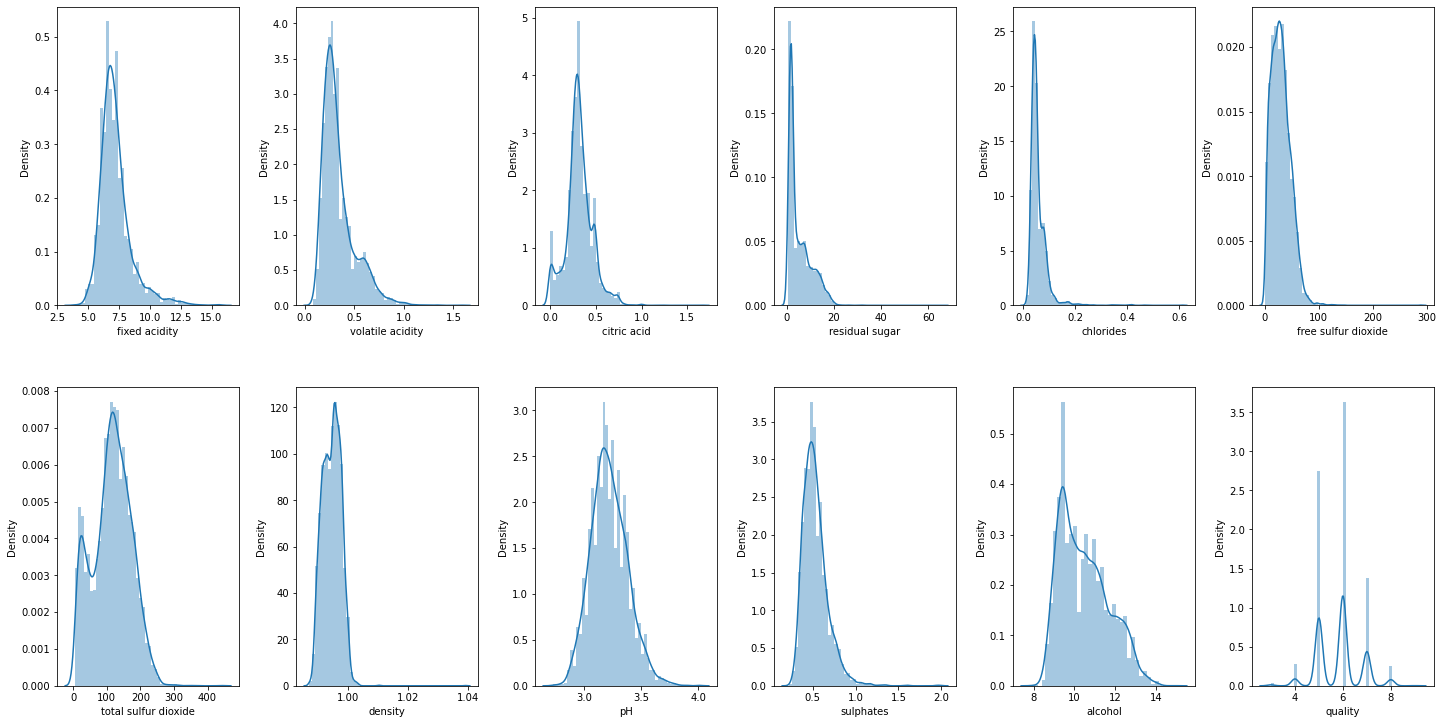

In [14]:
# create dist plot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

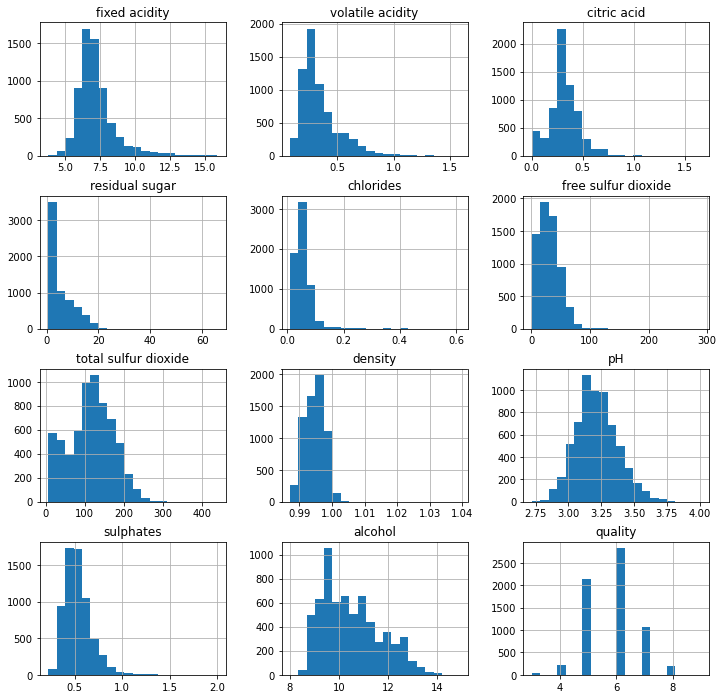

In [15]:
# We already showed distribution above this one is same


df.hist(bins=20,figsize=(12,12))
# display histogram
plt.show()

In [16]:
# log transformation we can use this to show standard scaler concept so 1 max 2 should be enough
df['free sulfur dioxide'] = np.log(1 + df['free sulfur dioxide'])


<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

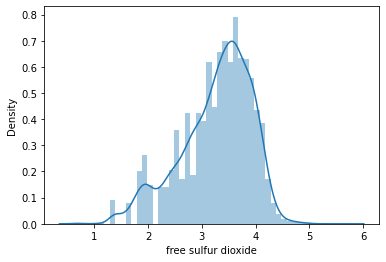

In [17]:
sns.distplot(df['free sulfur dioxide'])

<AxesSubplot:xlabel='density', ylabel='Density'>

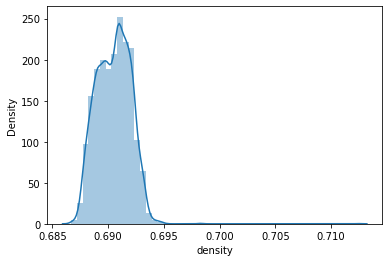

In [18]:
df['density'] = np.log(1 + df['density'])
sns.distplot(df['density'])

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

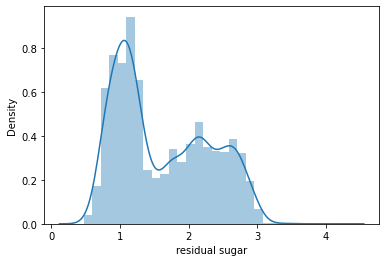

In [19]:
df['residual sugar'] = np.log(1 + df['residual sugar'])
sns.distplot(df['residual sugar'])

<AxesSubplot:title={'center':'Quality vs alcohol'}, xlabel='quality', ylabel='alcohol'>

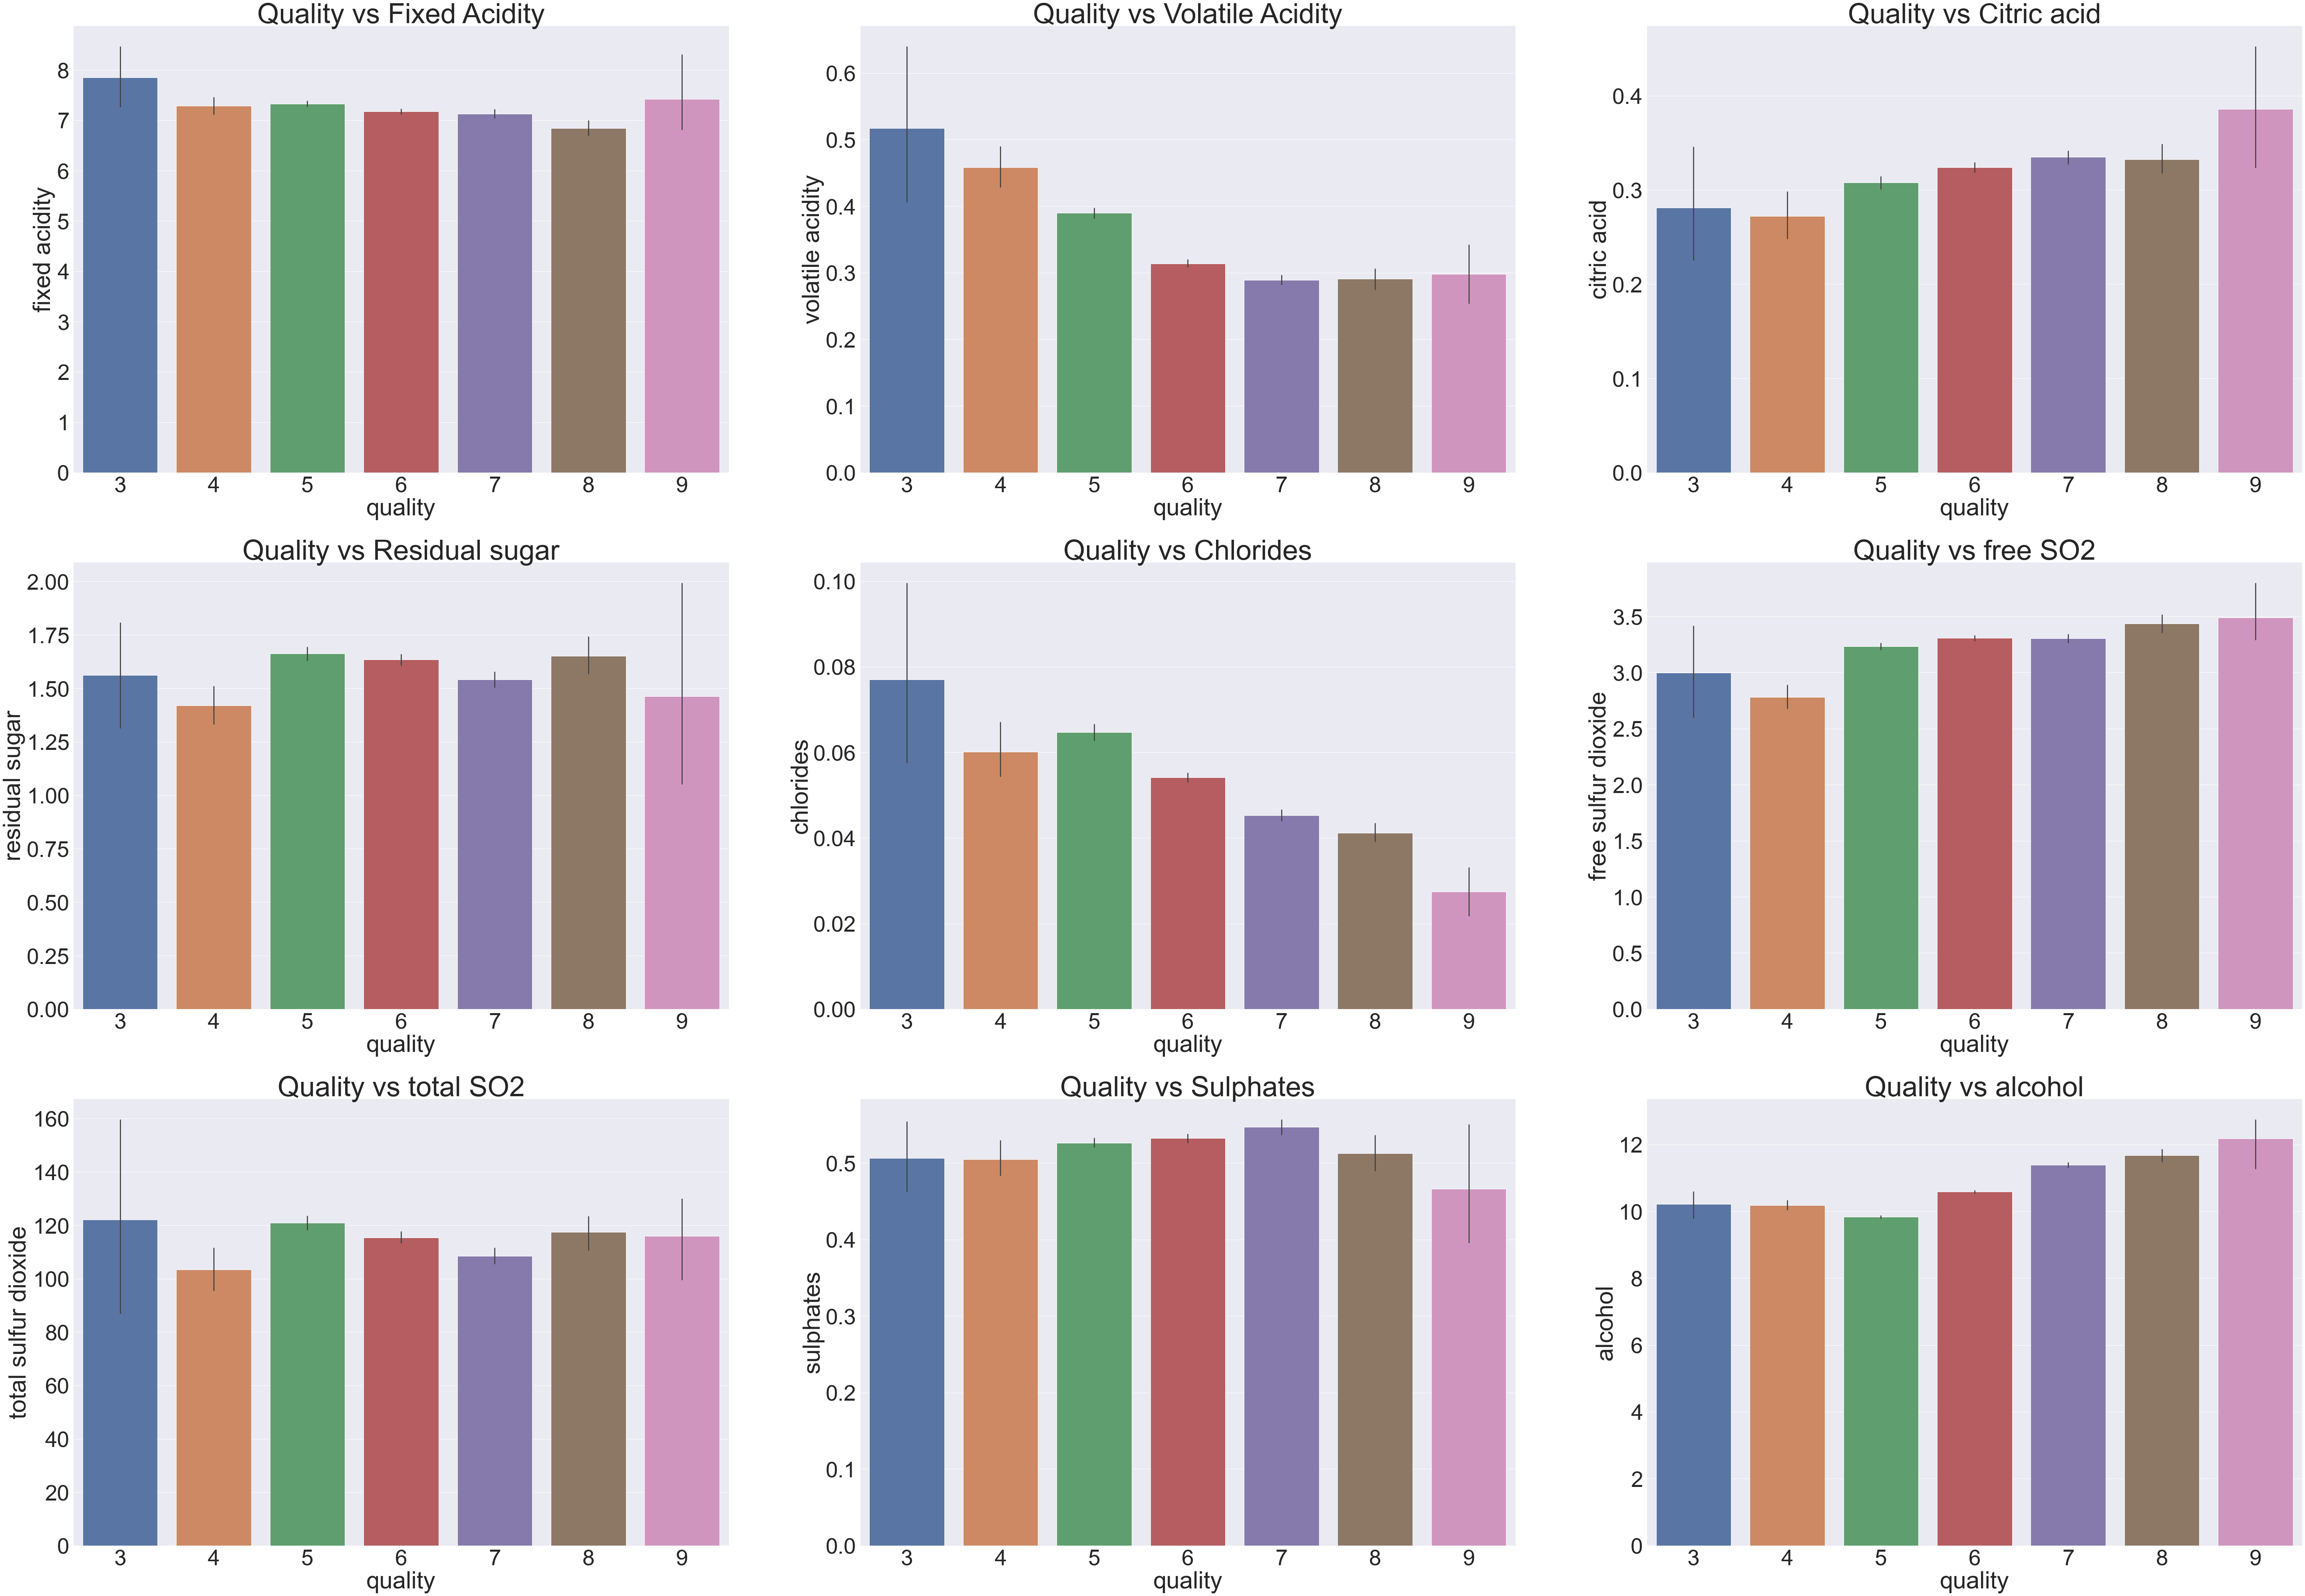

In [20]:
plt.figure(figsize=(100,70))
sns.set(font_scale=5)
plt.subplot(331)
plt.title("Quality vs Fixed Acidity",fontsize=70)
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

plt.subplot(332)
plt.title("Quality vs Volatile Acidity",fontsize=70)
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

plt.subplot(333)
plt.title("Quality vs Citric acid",fontsize=70)
sns.barplot(x = 'quality', y = 'citric acid', data = df)

plt.subplot(334)
plt.title("Quality vs Residual sugar",fontsize=70)
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

plt.subplot(335)
plt.title("Quality vs Chlorides",fontsize=70)
sns.barplot(x = 'quality', y = 'chlorides', data = df)

plt.subplot(336)
plt.title("Quality vs free SO2",fontsize=70)
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

plt.subplot(337)
plt.title("Quality vs total SO2",fontsize=70)
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

plt.subplot(338)
plt.title("Quality vs Sulphates",fontsize=70)
sns.barplot(x = 'quality', y = 'sulphates', data = df)

plt.subplot(339)
plt.title("Quality vs alcohol",fontsize=70)
sns.barplot(x = 'quality', y = 'alcohol', data = df)

<AxesSubplot:xlabel='type', ylabel='count'>

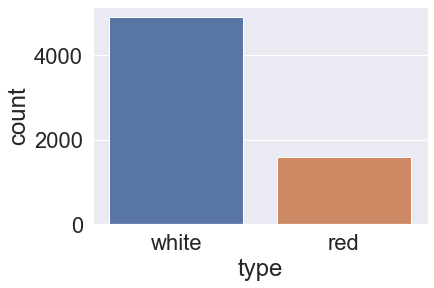

In [21]:
sns.set(font_scale=2)
sns.countplot(df['type'])

<AxesSubplot:xlabel='quality', ylabel='count'>

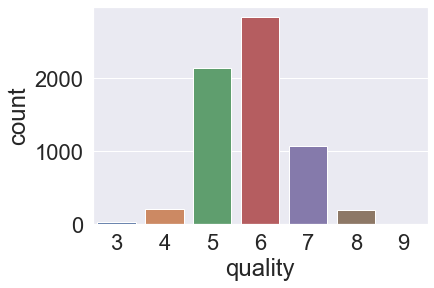

In [22]:
sns.countplot(df['quality'])

<AxesSubplot:>

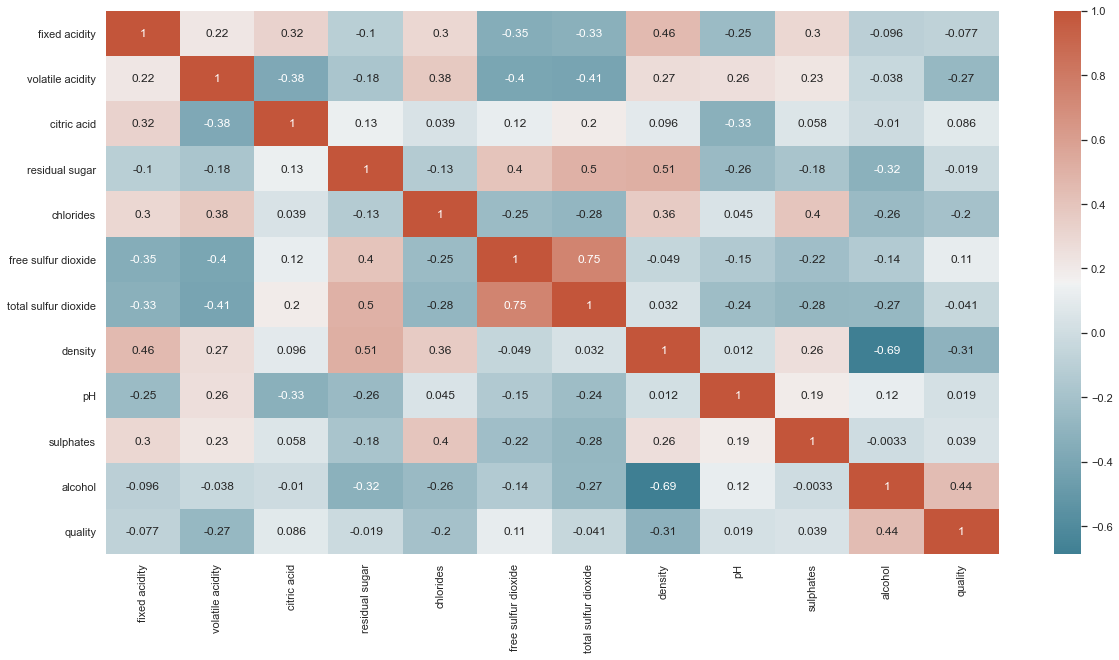

In [23]:
sns.set(font_scale=1)
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

## Making labelled classes of quality 

In [24]:
classes = ['bad','good', 'excellent']
df['quality_label'] = [classes[2] if x >= 7 else (classes[1] if x > 4 and x < 7 else classes[0]) for x in df['quality']]

label_quality = LabelEncoder()
df['quality_cluster'] = label_quality.fit_transform(df['quality_label'])
df['quality_cluster'].value_counts()

2    4974
1    1277
0     246
Name: quality_cluster, dtype: int64

## Checking if we can find clusters of data

In [25]:
y = df['quality']
X = df.drop(['type','quality','quality_label','quality_cluster'], axis=1)

In [26]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [27]:
pca = PCA(n_components=2)
reduced_X = pd.DataFrame(pca.fit_transform(X), columns=["PC1", "PC2"])
reduced_X['cluster'] = y
reduced_X.head(10)

,PC1,PC2,cluster
0,-2.127050,2.927743,6
1,0.120626,-0.513006,6
2,-0.378038,0.555575,6
3,-1.826354,0.864797,6
4,-1.826354,0.864797,6
5,-0.378038,0.555575,6
6,-0.913597,0.121177,6
7,-2.127050,2.927743,6
8,0.120626,-0.513006,6
9,-0.336372,-0.554741,6


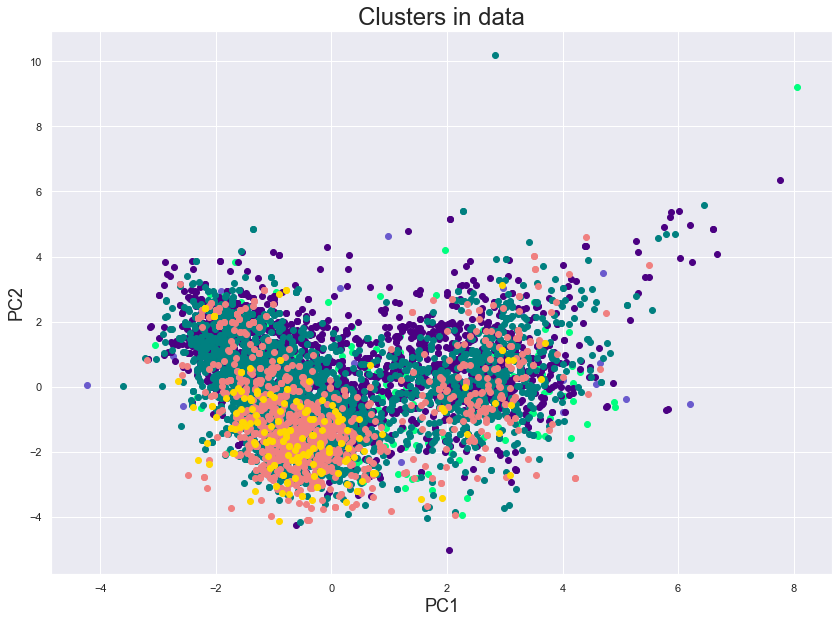

In [28]:
plt.figure(figsize=(14, 10))
sns.set(font_scale=1)
colours = ['slateblue', 'springgreen', 'indigo', 'teal', 'lightcoral', 'gold', 'cyan']
for i in range(3, 9):
    plt.scatter(reduced_X[reduced_X['cluster'] == i].loc[:, 'PC1'], reduced_X[reduced_X['cluster'] == i].loc[:, 'PC2'], color=colours[i-3])

plt.title("Clusters in data", fontsize = 24)
plt.xlabel("PC1", fontsize = 18)
plt.ylabel("PC2", fontsize = 18)
plt.show()

# Data Preprocessing 

# Input Split

In [34]:
X = df.drop(columns=['type', 'quality','quality_label','quality_cluster'])
y = df['quality_cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [35]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [31]:
# from sklearn.model_selection import GridSearchCV
# mlp = MLPClassifier(max_iter=100)
# parameter_space = {
#     'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,), (256, 256)],
#     'activation': ['tanh', 'relu'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant','adaptive'],
# }
# clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
# clf.fit(X_train, y_train)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-31-08748d78dba7>", line 11, in <module>
    clf.fit(X_train, y_train)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py", line 736, in fit
    self._run_search(evaluate_candidates)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py", line 1188, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py", line 708, in evaluate_candidates
    out = parallel(delayed(_fit_and_score)(clone(base_estimator),
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1061

TypeError: object of type 'NoneType' has no len()

In [ ]:
# Best paramete set
print('Best parameters found: ', clf.best_params_)


# All results
# means = clf.cv_results_['mean_test_score']
# stds = clf.cv_results_['std_test_score']
# for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

In [36]:
model = MLPClassifier(hidden_layer_sizes = (50, 50, 50), 
                        max_iter=100,
                        activation='tanh',
                        alpha = 0.0001,
                        learning_rate = 'adaptive', 
                        solver = 'adam')
model.fit(X_train, y_train)
print(f"Model Accuracy: {model.score(X_test, y_test)}")

Model Accuracy: 0.78


In [ ]:
perceptron = Perceptron(max_iter=100)
perceptron.fit(X_train, y_train)
print(f"Model Accuracy: {perceptron.score(X_test, y_test)}")

# Class Imbalancement

In [ ]:
y.value_counts()

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
transform the dataset
X, y = oversample.fit_resample(X, y)

In [ ]:
y.value_counts()

# Model Training

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
def classify(model, X, y):
    # train the model
    model.fit(x_train, y_train)
    print("Accuracy:", model.score(x_test, y_test) * 100)
    
    # cross-validation
    score = cross_val_score(model, X, y, cv=5)
    print("CV Score:", np.mean(score)*100)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model, X, y)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model, X, y)

In [ ]:
!pip install xgboost

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm 
model = lightgbm.LGBMClassifier()
classify(model, X, y)